In [1]:
from matplotlib import pyplot as plt
from PIL import Image, ImageFile
import os
from tqdm import tqdm
# the following is for https://github.com/python-pillow/Pillow/issues/3185
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
# resize with the shortest edge

def resize(im, fixed_size=224):
    w, h = im.size
    if w <= h:  # fixed width to 224
        width_percent = (fixed_size / w)
        height_size = int(h * width_percent)
        im = im.resize((fixed_size, height_size), Image.NEAREST)
    else:  # fixed height to 224
        height_percent = (fixed_size / h)
        width_size = int((w * height_percent))
        im = im.resize((width_size, fixed_size), Image.NEAREST)
    return im

# center crop an image assuming the image is larger than 224 x 224

def center_crop(img, w_crop=224, h_crop=224):

    w, h = img.size  
    # int() handles size with odd number 
    # coordinates for the left upper and lower right corner points
    left = int(w/2 - w_crop/2)
    upper = int(h/2 - h_crop/2)
    right = left + w_crop
    lower = upper + h_crop

    img_cropped = img.crop((left, upper, right, lower))
    return img_cropped

(-0.5, 223.5, 223.5, -0.5)

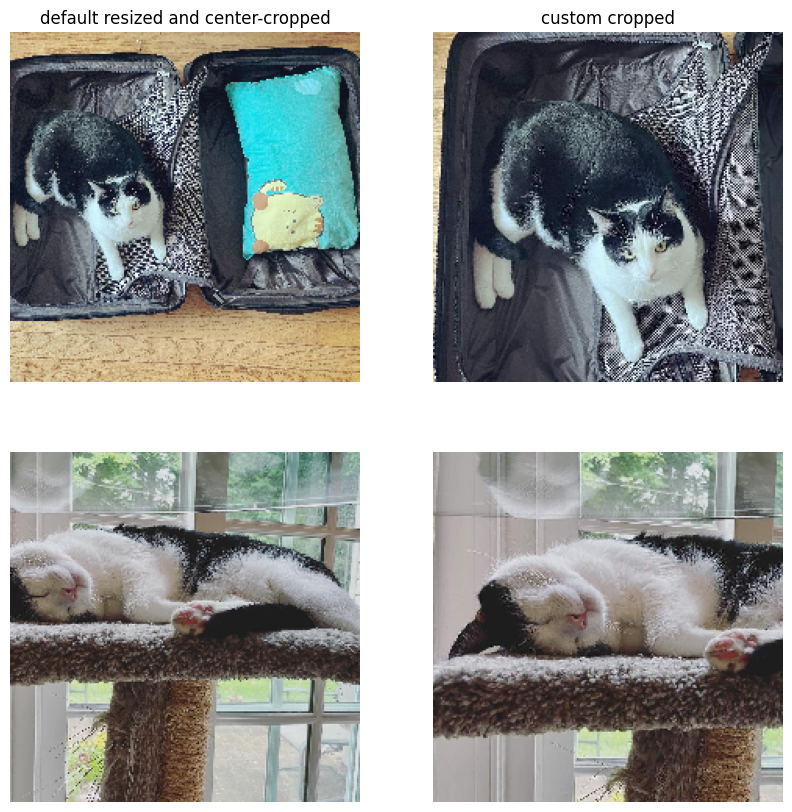

In [3]:
# resize and then center crop

img1 = Image.open('data/original/cat/09.jpg')
img2 = Image.open('data/original/cat/13.jpg')
img3 = Image.open('data/dreambooth/cat/09.jpg')
img4 = Image.open('data/dreambooth/cat/13.jpg')

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(center_crop(resize(img1)))
ax[0, 0].set_title('default resized and center-cropped')
ax[1, 0].imshow(center_crop(resize(img2)))
ax[0, 1].set_title('custom cropped')
ax[0, 1].imshow(resize(img3))
ax[1, 1].imshow(resize(img4))
ax[0, 0].axis('off')
ax[0, 1].axis('off')
ax[1, 0].axis('off')
ax[1, 1].axis('off')

#fig.savefig('resize-crop-example.jpg')

In [4]:
# resize and compress each image

# each image is resized (same ratio) and compressed into a new folder
dir_org = './data/original/missdong'  # folder with the original images
dir_compressed = './data/dreambooth/missdong'  # folder for the compressed images
fixed_height = 512  # fixed height after resizing
quality = 85  # percentage of the compression, e.g., 85%


# find all jpg files
files = os.listdir(dir_org)  # all files in the folder
images = [file for file in files if file.endswith(('png'))]  # only jpg files


count = 0
for image in tqdm(images):

    compressed_image = dir_compressed + '/' + image  # the path for the compressed image
    if not os.path.exists(compressed_image):  # skip processed images
        #print(f'processing {image}')

        try:
            # open the image
            im = Image.open(dir_org + '/' + image)

            # convert to RGB
            # RGBA cannot be saved into JPG https://stackoverflow.com/questions/48248405/cannot-write-mode-rgba-as-jpeg
            im = im.convert('RGB')  
            
            # resize with the same ratio
            height_percent = (fixed_height / float(im.size[1]))
            width_size = int((float(im.size[0]) * float(height_percent)))
            im = im.resize((width_size, fixed_height), Image.NEAREST)

            # compress
            im.save(dir_compressed + '/' + image, optimize=True, quality=quality)

            count += 1
        except Exception as ex:
            print(f'something wrong with {image}', ex)
            break  # stop

print(f'complete processing {count} images')

100%|██████████| 30/30 [00:09<00:00,  3.05it/s]

complete processing 30 images
